In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
transmat = np.array(
    [[0.4, 0.1, 0.3],
     [0.1, 0.5, 0.3],
     [0.5, 0.4, 0.4]]
)
emissionprob = np.array(
    [[1.0, 0.0, 0.0],
     [0.0, 1.0, 0.0],
     [0.0, 0.0, 1.0]]
)

In [3]:
def random_transition(n=100, w_0=np.array([1.0, 0.0, 0.0]) ) :
    # return [sunny, rainy, cloudy]
    X = transmat
    w = w_0[:]
    for i in range(n):
        w = X @ w
        w = np.eye(3)[np.random.choice(a=[0,1,2], p=w)]
        yield w
def random_action(w) :
    # return [walk, shop, cleen]
    if w.argmax() == 0 :
        return np.eye(3)[np.random.choice(a=[0,1,2], p=emissionprob[0])]
    if w.argmax() == 1 :
        return np.eye(3)[np.random.choice(a=[0,1,2], p=emissionprob[1])]
    if w.argmax() == 2 :
        return np.eye(3)[np.random.choice(a=[0,1,2], p=emissionprob[2])]

In [4]:
w = np.array([w for w in random_transition(n=10000)])
y = np.array([*map(random_action, w)])
w_index = np.array([*map(np.argmax, w)])
y_index = np.array([*map(np.argmax, y)])

In [5]:
X = np.array([*map(np.argmax, y)])
X = X.reshape(-1, 1)
print(X.shape)
# 行動から天気を三つに分類する
model = hmm.MultinomialHMM(n_components=3)
# startprob は不明
model.startprob = np.array([1.0, 0.0, 0.0])
model.transmat = transmat
model.emissionprob = emissionprob
model.fit(X)
L,Z = model.decode(X)

(10000, 1)


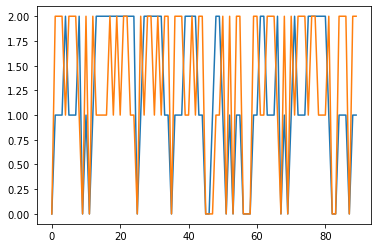

In [6]:
plt.plot(Z[:90])
plt.plot(w_index[:90])

In [7]:
model.emissionprob_

array([[0.83386786, 0.12642868, 0.03970347],
       [0.19771084, 0.06565066, 0.7366385 ],
       [0.02523231, 0.68188944, 0.29287824]])

In [8]:
confusion_matrix(Z, w_index)

array([[2407,   23,    0],
       [ 235,   22, 3558],
       [   0, 3061,  694]])

In [ ]:
print('なぜだ...')